# MSE Homework 11

In [1]:
from thermostate import Q_,units
import numpy as np

# Problem 10.10

The kinetics of the austenite-to-pearlite transformation obeys the Avrami relationship. Using the fraction transformed–time data given here, determine the total time required for 95% of the austenite to transform to pearlite:

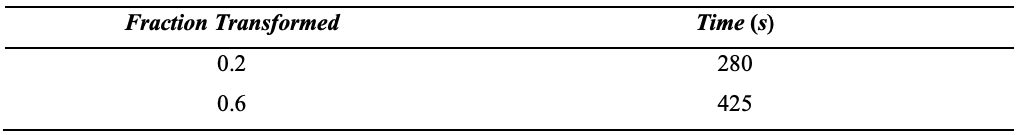

# Solution

The Avrami relationship is:

$$y=1-exp(-kt^n)$$

Where k and n are constants

y is the fraction transformed

t is time

We know have a system of two equations:

$$0.2 = 1-exp(-k\cdot280^n)$$

$$0.6 = 1-exp(-k\cdot425^n)$$

Taking the natural log of both sides of both equations gives:

$$-k\cdot280^n = ln(1-0.2)$$

$$-k\cdot425^n = ln(1-0.6)$$

Taking another natural log gives:

$$ln(k)+n\cdot ln(280) = ln(-ln(0.8))$$

$$ln(k)+n\cdot ln(425) = ln(-ln(0.4))$$

We will transform this to the matrix:

$$\begin{bmatrix} 1 & ln(280) \\ 1 & ln(425) \end{bmatrix} \left[ \begin{array}{c} ln(k) \\ n \end{array} \right] = \left[ \begin{array}{c} ln(-ln(0.8)) \\ ln(-ln(0.4)) \end{array} \right]$$

That means that:

$$\left[ \begin{array}{c} ln(k) \\ n \end{array} \right] =\begin{bmatrix} 1 & ln(280) \\ 1 & ln(425) \end{bmatrix}^{-1} \cdot \left[ \begin{array}{c} ln(-ln(0.8)) \\ ln(-ln(0.4)) \end{array} \right]$$

In [2]:
A = np.array([[1, np.log(280)], [1, np.log(425)]])
B = np.array([[np.log(-np.log(0.8))], [np.log(-np.log(0.4))]])

X = np.linalg.inv(A).dot(B)
print("ln(k) =", X[0][0])
print("n =", X[1][0])
n = X[1][0]

ln(k) = -20.573154368249703
n = 3.384902671567824


In [3]:
k = np.exp(X[0][0])
print("k =", k)

k = 1.161963758095431e-09


Rearranging Avrami's relation gives:

$$t=\left( -\frac{ln(1-y)}{k}\right)^{1/n}$$

Plugging in our 0.95 in question gives:

In [4]:
t = (-np.log(1-0.95)/k)**(1/n)
print(t)

603.0848820013792


<div class="alert alert-success">

$t=603.08$ seconds 

</div>

# Problem 10.11

The fraction recrystallized–time data for the recrystallization at 350°C of a previously deformed aluminum are tabulated here. Assuming that the kinetics of this process obey the Avrami relationship, determine the fraction recrystallized after a total time of 116.8 min.

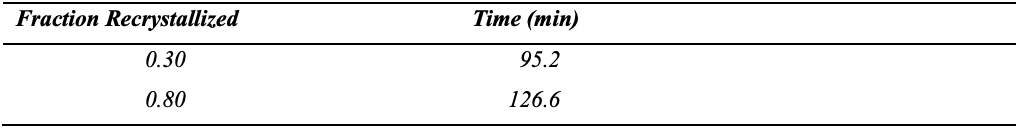

# Solution

Avrami's relationship is:

$$y=1-exp(-kt^n)$$

We can further rearrange it, as show in Problem 10.10, to read:

$$ln(k) + n \cdot ln(t) = ln(-ln(1-y))$$

Plugging in our tablulated values for y and t and tranforming to a maxtrix gives:

$$\begin{bmatrix} 1 & ln(95.2) \\ 1 & ln(126.6) \end{bmatrix} \left[ \begin{array}{c} ln(k) \\ n \end{array} \right] = \left[ \begin{array}{c} ln(-ln(0.7)) \\ ln(-ln(0.2)) \end{array} \right]$$

This can be solved giving:

In [5]:
A = np.array([[1, np.log(95.2)], [1, np.log(126.6)]])
B = np.array([[np.log(-np.log(0.7))], [np.log(-np.log(0.2))]])

X = np.linalg.inv(A).dot(B)
print("ln(k) =", X[0][0])
print("n =", X[1][0])
n = X[1][0]
k = np.exp(X[0][0])
print("k =", k)

ln(k) = -25.114280807582688
n = 5.28609666462297
k = 1.2388149229656817e-11


Now we can plug these values into Avrami's relationship, as well as 116.8 min, to get our y value of:

In [6]:
y = 1-np.exp(-k*116.8**n)
print("y =", y)

y = 0.6505020519976082


<div class="alert alert-success">

$y = 0.65$ Fraction Recrystalized 

</div>

# Problem 10.13

Determine values for the constants n and k (Equation 10.17) for the recrystallization of copper (Figure 10.11) at 119°C.

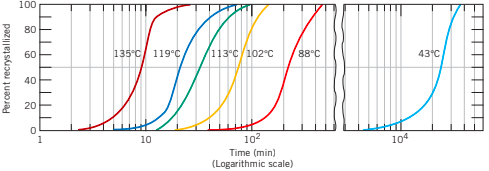

# Solution

We will again use Avrami's relationship which is:

$$y=1-exp(-kt^n)$$

We can further rearrange it, as show in Problem 10.10, to read:

$$ln(k) + n \cdot ln(t) = ln(-ln(1-y))$$

Now we will approximate 2 data points (t,y) from the 119$^o$C line of our figure:

$(15,0.2)$

$(20,0.5)$

Plugging these data points into our equation and break into a system gives:

$$\begin{bmatrix} 1 & ln(15) \\ 1 & ln(20) \end{bmatrix} \left[ \begin{array}{c} ln(k) \\ n \end{array} \right] = \left[ \begin{array}{c} ln(-ln(0.8)) \\ ln(-ln(0.5)) \end{array} \right]$$

Solving this gives values of n and ln(k):

In [7]:
A = np.array([[1, np.log(15)], [1, np.log(20)]])
B = np.array([[np.log(-np.log(0.8))], [np.log(-np.log(0.5))]])

X = np.linalg.inv(A).dot(B)
#print("ln(k) =", X[0][0])
print("n =", X[1][0])
n = X[1][0]
k = np.exp(X[0][0])
print("k =", k)

n = 3.939859917297517
k = 5.187397518297092e-06


# Problem 10.24

Name the microstructural products of eutectoid iron–carbon alloy (0.76 wt% C) specimens that are first completely transformed to austenite, then cooled to room temperature at the following rates:

(a) 1°C/s 

(b) 20°C/s

(c) 50°C/s 

(d) 175°C/s

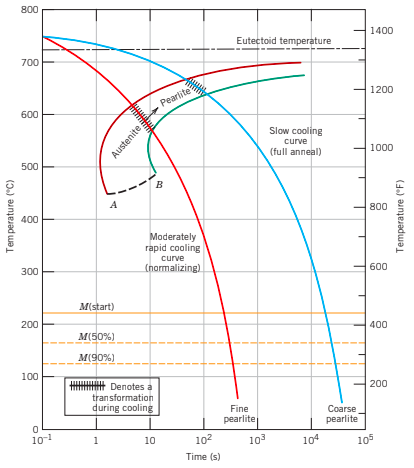

# Solution

(a) will take the longest time, which would be course pearlite

(b) At a rate of 20°C/s, fine pearlite forms.

(c) At a rate of 50°C/s, fine pearlite and martensite form.

(d) At a rate of 175oC/s, martensite forms.

# Problem 10.31 

Briefly explain why fine pearlite is harder and stronger than coarse pearlite, which in turn is harder and stronger than spheroidite.

# Solution


The hardness and strength of iron-carbon alloys that have microstructures consisting of a-ferrite and cementite phases depend on the boundary area between the two phases. The greater this area, the harder and stronger the alloy inasmuch as (1) these boundaries impede the motion of dislocations, and (2) the cementite phase restricts the deformation of the ferrite phase in regions adjacent to the phase boundaries. Fine pearlite is harder and stronger than coarse pearlite because the alternating ferrite-cementite layers are thinner for fine, and therefore, there is more phase boundary area. The phase boundary area between the sphere-like cementite particles and the ferrite matrix is less in spheroidite than for the alternating layered microstructure found in coarse pearlite.

# Problem 10.34 

Briefly explain why the hardness of tempered martensite diminishes with tempering time (at constant temperature) and with increasing temperature (at constant tempering time).

# Solution

This question asks for an explanation as to why the hardness of tempered martensite diminishes with tempering time (at constant temperature) and with increasing temperature (at constant tempering time). The hardness of tempered martensite depends on the ferrite-cementite phase boundary area; since these phase boundaries are barriers to dislocation motion, the greater the area the harder the alloy. The microstructure of tempered martensite consists of small sphere-like particles of cementite embedded within a ferrite matrix. As the size of the cementite particles increases, the phase boundary area diminishes, and the alloy becomes softer. Therefore, with increasing tempering time, the cementite particles grow, the phase boundary area decreases, and the hardness diminishes. As the tempering temperature is increased, the rate of cementite particle growth also increases, and the alloy softens, again, because of the decrease in phase boundary area.